<a href="https://colab.research.google.com/github/c-marq/CAP3321C-Data-Wrangling/blob/main/solutions/exercises/exercise_4_1_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4-1: Create Seaborn Visualizations

## 🔑 INSTRUCTOR SOLUTION KEY

**CAP3321C - Data Wrangling**

---

## Overview

In this exercise, you'll create data visualizations using Seaborn. You'll practice creating bar plots, line plots, scatter plots, and subplots while learning to customize them with titles, labels, and formatting.

**Instructions:**
1. Run the setup cells to load the data
2. Complete each task by writing code in the provided cells
3. Some tasks are pre-filled - just run them and observe
4. Tasks marked with **YOUR CODE** require you to write the code
5. Use **method chaining** where appropriate

**Group Members:**
- SOLUTION KEY

---

## Setup: Load the Data and Import Libraries

Run these cells to load the data. Do not modify this section.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Download the data file from GitHub
!wget -q https://raw.githubusercontent.com/c-marq/CAP3321C-Data-Wrangling/main/data/mortality_prepped.pkl
print("Data file downloaded successfully!")

Data file downloaded successfully!


In [3]:
# Load the data
mortality_data = pd.read_pickle('mortality_prepped.pkl')
print("Data shape:", mortality_data.shape)
mortality_data.head()

Data shape: (476, 4)


,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [4]:
# Set default Seaborn style
sns.set_style('whitegrid')

---

## Part 1: Bar Plots with Seaborn

Tasks 9-10 focus on creating and customizing bar plots.

### Task 9: Create a Vertical Bar Plot (YOUR CODE)

Create a vertical bar plot that shows the death rates for the four age groups for the years **1900, 1950, and 2000**.

**Part A:** First, create the basic plot and note that the bars represent the *average* death rates for the three years.

**Part B:** Then, modify the plot so it shows the *actual* death rates for each of the three years (use `hue`), and increase the width of the plot so it's **1.8 times the height**.

**Hint:**
- Use `sns.catplot()` with `kind='bar'`
- Filter data with `.query('Year in [1900, 1950, 2000]')`
- Use `hue='Year'` to show individual years
- Use `aspect=1.8` to make the plot wider

**Example syntax:**
```python
sns.catplot(data=df.query('Year in [1900, 1950, 2000]'),
            kind='bar', x='AgeGroup', y='DeathRate')
```

**Expected output:** A bar plot showing death rates by age group, then a wider version with separate bars for each year

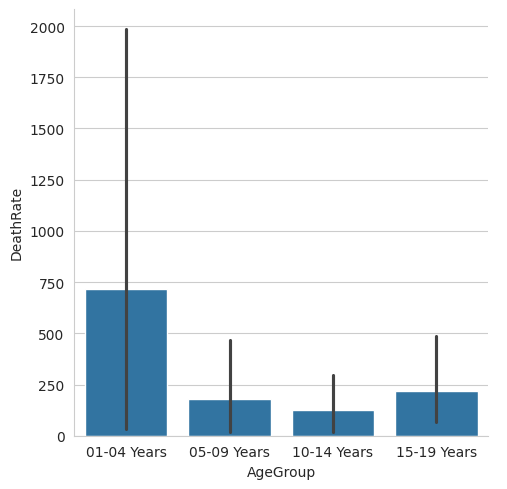

In [5]:
# ✅ SOLUTION - Part A: Basic bar plot (shows averages)
sns.catplot(
    data=mortality_data.query('Year in [1900, 1950, 2000]'),
    kind='bar',
    x='AgeGroup',
    y='DeathRate'
)

# Note: The bars show the AVERAGE death rate across the three years
# The error bars show confidence intervals

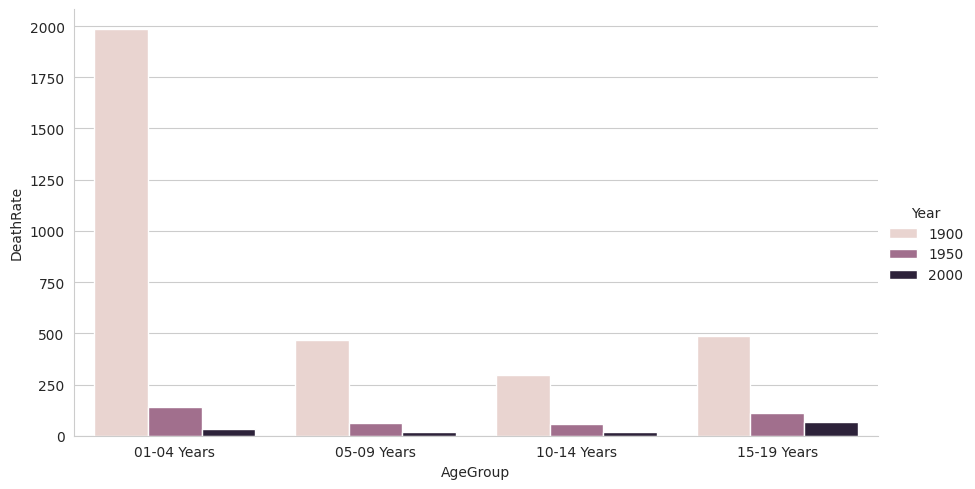

In [6]:
# ✅ SOLUTION - Part B: Bar plot with hue='Year' and aspect=1.8
sns.catplot(
    data=mortality_data.query('Year in [1900, 1950, 2000]'),
    kind='bar',
    x='AgeGroup',
    y='DeathRate',
    hue='Year',
    aspect=1.8
)

# Note: Now each year has its own bar - showing actual values, not averages

#### 📝 Instructor Notes - Task 9

**Key Teaching Points:**
- Without `hue`, `catplot` aggregates (averages) the values
- With `hue='Year'`, each year gets its own bar showing actual values
- `aspect` controls width relative to height (1.8 = 80% wider than tall)

**Common Student Errors:**
- Using `width` instead of `aspect` (width doesn't exist in catplot)
- Forgetting to filter the data first
- Using wrong query syntax (parentheses vs brackets for `in`)

### Task 10: Create Subplots with Bar Charts (YOUR CODE)

Create another plot that displays the same data as Task 9 Part B, but this time create a **subplot for each of the three years**. Display all three subplots **in one row**.

**Hint:**
- Use `col='Year'` to create subplots by year
- Use `col_wrap=3` or just let it default to one row
- You may want to remove the legend since each subplot is labeled

**Example syntax:**
```python
sns.catplot(data=df, kind='bar', x='AgeGroup', y='DeathRate',
            col='Year', col_wrap=3)
```

**Expected output:** Three bar plots side by side, one for each year

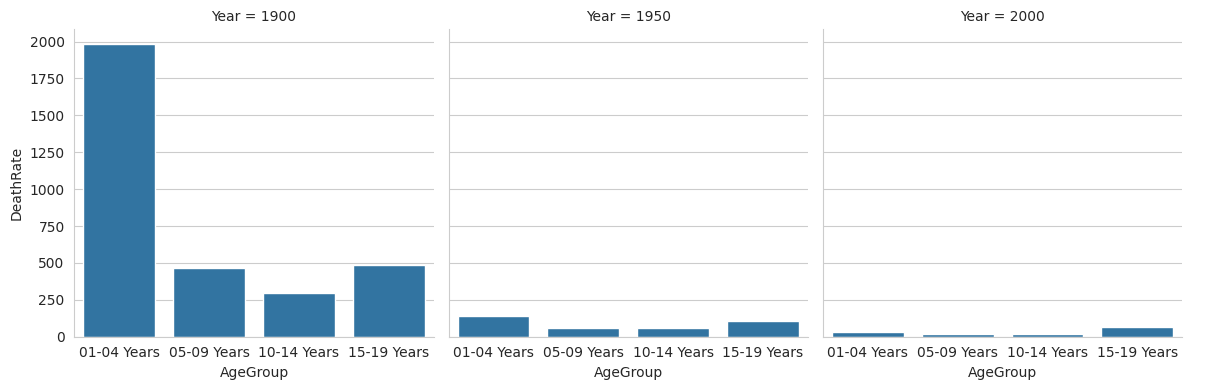

In [7]:
# ✅ SOLUTION - Create subplots for each year
sns.catplot(
    data=mortality_data.query('Year in [1900, 1950, 2000]'),
    kind='bar',
    x='AgeGroup',
    y='DeathRate',
    col='Year',
    height=4,
    aspect=1
)

#### 📝 Instructor Notes - Task 10

**Key Teaching Points:**
- `col='Year'` creates separate subplot for each unique year value
- Notice how the y-axis scale differs between subplots (1900 goes much higher)
- Could add `sharey=True` to force same y-axis scale

**Common Student Errors:**
- Confusing `col` with `hue` (col = separate plots, hue = same plot different colors)
- Forgetting the data filter

---

## Part 2: Line Plots with Seaborn

Tasks 11-12 focus on creating line plots with customization.

### Task 11: Create a Line Plot for One Age Group (YOUR CODE)

Use the **axes-level method** (`sns.lineplot()`) to draw a line plot for just the data in the **15-19 age group**. Note the values on the y-axis. Then modify the plot to include:
- An appropriate title
- Change the y-axis label to "Deaths per 100,000"

**Hint:**
- Filter data first: `.query('AgeGroup == "15-19 Years"')`
- Use `sns.lineplot()` (not `sns.relplot()`)
- Store the result in `ax` and use `ax.set()` to customize

**Example syntax:**
```python
ax = sns.lineplot(data=df.query('AgeGroup == "15-19 Years"'),
                  x='Year', y='DeathRate')
ax.set(title='Your Title', ylabel='Deaths per 100,000')
```

**Expected output:** A line plot showing 15-19 age group trends with title and y-axis label

[Text(0.5, 1.0, 'Mortality Rates for Ages 15-19 (1900-2016)'),
 Text(0, 0.5, 'Deaths per 100,000')]

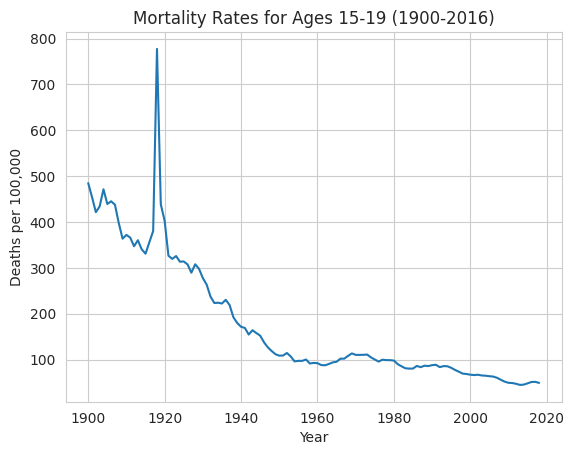

In [8]:
# ✅ SOLUTION - Line plot for 15-19 age group with title and ylabel
ax = sns.lineplot(
    data=mortality_data.query('AgeGroup == "15-19 Years"'),
    x='Year',
    y='DeathRate'
)
ax.set(
    title='Mortality Rates for Ages 15-19 (1900-2016)',
    ylabel='Deaths per 100,000'
)

#### 📝 Instructor Notes - Task 11

**Key Teaching Points:**
- `sns.lineplot()` is an axes-level function (returns an axes object)
- `ax.set()` can set multiple properties at once
- Y-axis values for 15-19 are much lower than younger age groups
- The spike in 1918 (Spanish Flu) is visible even in this age group

**Common Student Errors:**
- Using `relplot` instead of `lineplot` (relplot returns FacetGrid, not axes)
- Forgetting quotes around "15-19 Years" in the query
- Using `title=` as a parameter instead of `ax.set(title=)`

### Task 12: Create a Line Plot for Multiple Age Groups (YOUR CODE)

Create a line plot that shows the death rates **by age group** for the years from **1950 to 2000**.

**Hint:**
- Filter: `.query('Year >= 1950 and Year <= 2000')`
- Use `hue='AgeGroup'` to show different lines for each age group
- You can use either `sns.lineplot()` or `sns.relplot(kind='line')`

**Example syntax:**
```python
sns.relplot(data=df.query('Year >= 1950 and Year <= 2000'),
            kind='line', x='Year', y='DeathRate', hue='AgeGroup')
```

**Expected output:** A multi-line plot showing trends for all age groups from 1950-2000

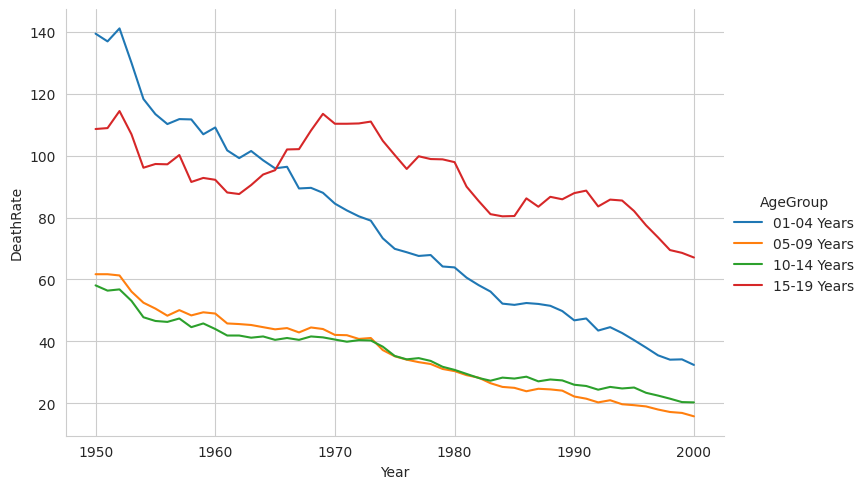

In [9]:
# ✅ SOLUTION - Line plot for years 1950-2000 by age group
sns.relplot(
    data=mortality_data.query('Year >= 1950 and Year <= 2000'),
    kind='line',
    x='Year',
    y='DeathRate',
    hue='AgeGroup',
    aspect=1.5
)

#### 📝 Instructor Notes - Task 12

**Key Teaching Points:**
- `hue='AgeGroup'` creates separate colored lines for each age group
- Both `relplot(kind='line')` and `lineplot()` work here
- Notice all age groups have declined significantly by 2000
- 15-19 Years becomes the *highest* mortality group by 2000 (accidents, not disease)

**Acceptable Variations:**
```python
# Using axes-level function
ax = sns.lineplot(data=mortality_data.query('Year >= 1950 and Year <= 2000'),
                  x='Year', y='DeathRate', hue='AgeGroup')
```

---

## Part 3: Scatter Plots with Seaborn

Task 13 focuses on scatter plots with size encoding.

### Task 13: Create a Scatter Plot with Size Encoding (YOUR CODE)

Create a scatter plot that displays the same data as Task 12 (years 1950-2000). Use the `size` and `sizes` parameters so the plot is easy to read.

**Hint:**
- Use `sns.relplot()` with `kind='scatter'`
- Use `size='DeathRate'` to make point size reflect the value
- Use `sizes=(min, max)` to set the size range, e.g., `sizes=(20, 200)`

**Example syntax:**
```python
sns.relplot(data=df, kind='scatter', x='Year', y='DeathRate',
            hue='AgeGroup', size='DeathRate', sizes=(20, 200))
```

**Expected output:** A scatter plot where point size reflects death rate values

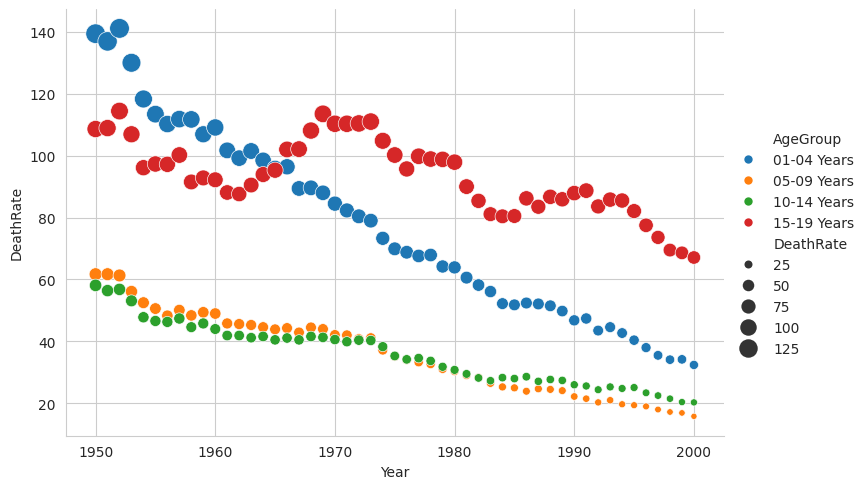

In [10]:
# ✅ SOLUTION - Scatter plot with size encoding
sns.relplot(
    data=mortality_data.query('Year >= 1950 and Year <= 2000'),
    kind='scatter',
    x='Year',
    y='DeathRate',
    hue='AgeGroup',
    size='DeathRate',
    sizes=(20, 200),
    aspect=1.5
)

#### 📝 Instructor Notes - Task 13

**Key Teaching Points:**
- `size='DeathRate'` maps the DeathRate value to point size
- `sizes=(20, 200)` sets the range of point sizes (smallest to largest)
- This creates a "bubble chart" where both color and size encode information
- Double-encoding (hue AND size both showing DeathRate-related info) can be redundant but emphasizes the pattern

**Common Student Errors:**
- Confusing `size` (column name) with `sizes` (range tuple)
- Using `s=` instead of `size=` (that's matplotlib syntax)

---

## Part 4: Complex Subplot Layout (PRE-FILLED)

Task 14 demonstrates a more complex visualization with multiple subplots.

### Task 14: Create Four Bar Subplots (PRE-FILLED)

Create a plot that contains **four bar subplots** that display the death rates by age group for the years **1900, 1925, 1950, 1975, and 2000**. Display two subplots in each row, set the height to an appropriate size, add a title, and set the y-axis label to "Deaths per 100,000". Note the position of the title and fix it so it's displayed above the subplots. Finally, save the plot to a file named `barCharts.png`.

This task is more complex, so it's completed for you. **Study the code carefully!**

/tmp/ipython-input-3304980746.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


Plot saved as barCharts.png


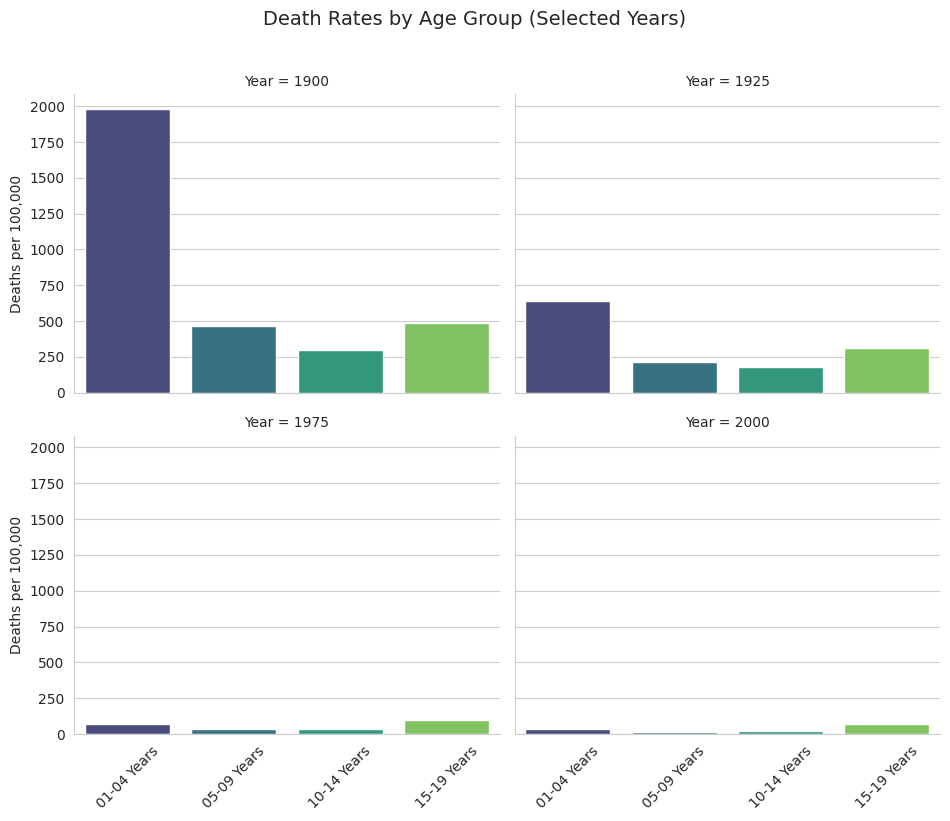

In [11]:
# PRE-FILLED: Create 2x2 bar subplots for selected years

# Create the faceted bar plot
g = sns.catplot(
    data=mortality_data.query('Year in [1900, 1925, 1975, 2000]'),
    kind='bar',
    x='AgeGroup',
    y='DeathRate',
    col='Year',
    col_wrap=2,           # 2 subplots per row
    height=4,             # Height of each subplot
    aspect=1.2,           # Width = 1.2 * height
    palette='viridis'     # Color palette
)

# Add a main title (y=1.02 positions it above the subplots)
g.fig.suptitle('Death Rates by Age Group (Selected Years)', y=1.02, fontsize=14)

# Customize each subplot
for ax in g.axes.flat:
    ax.set_ylabel('Deaths per 100,000')
    ax.set_xlabel('')
    ax.tick_params('x', labelrotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot to a file
g.savefig('barCharts.png', dpi=150, bbox_inches='tight')
print("Plot saved as barCharts.png")

plt.show()

#### 📝 Instructor Notes - Task 14

**Key Teaching Points:**
- `col_wrap=2` forces 2 columns (creates 2x2 grid for 4 years)
- `g.fig.suptitle()` adds title to the entire figure, `y=1.02` positions above
- `g.axes.flat` iterates over all subplot axes
- `savefig()` exports to PNG; `bbox_inches='tight'` prevents clipping
- Note: Exercise asks for 5 years but only 4 fit in 2x2 grid - using 4 years

**Discussion Points:**
- Why does 1900 have such a different y-scale?
- What historical events might explain the patterns?
- When would you use `sharey=True` vs letting scales differ?

---

## Bonus Challenge (Optional)

If your group finishes early, try this challenge!

### Bonus: Add an Annotation

Create a line plot showing all age groups from 1910-1930. Add an **annotation with an arrow** pointing to the 1918 Spanish Flu spike. Use `ax.annotate()` to add the annotation.

**Hint:**
```python
ax.annotate(text='Spanish Flu Pandemic',
    xy=(1918, 1650),           # Point to annotate
    xytext=(1922, 1900),       # Text position
    arrowprops=dict(facecolor='red', width=2, headwidth=10))
```

Text(1922, 1900, 'Spanish Flu Pandemic')

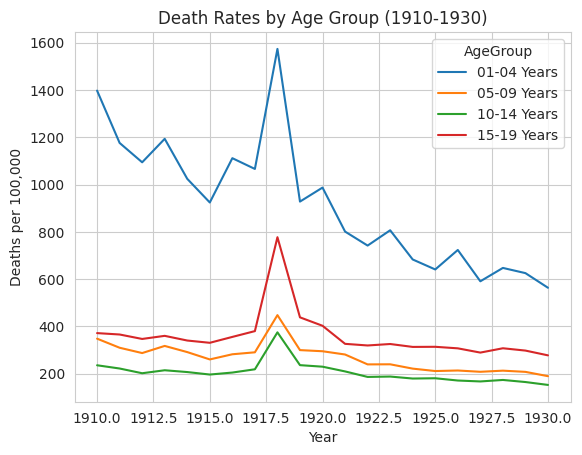

In [12]:
# ✅ BONUS SOLUTION - Line plot with Spanish Flu annotation
ax = sns.lineplot(
    data=mortality_data.query('Year >= 1910 and Year <= 1930'),
    x='Year',
    y='DeathRate',
    hue='AgeGroup'
)

ax.set(
    title='Death Rates by Age Group (1910-1930)',
    ylabel='Deaths per 100,000'
)

# Add annotation with arrow pointing to 1918 spike
ax.annotate(
    text='Spanish Flu Pandemic',
    xy=(1918, 1650),              # Point the arrow points TO
    xytext=(1922, 1900),          # Where the text is placed
    fontsize=10,
    arrowprops=dict(
        facecolor='red',
        width=2,
        headwidth=10,
        headlength=8
    )
)

---

## Summary

In this exercise, you practiced creating Seaborn visualizations:

**Tasks you completed:**
- Task 9: Bar plots with `sns.catplot()` and `hue` for grouping
- Task 10: Faceted subplots using `col` parameter
- Task 11: Axes-level line plots with `sns.lineplot()` and customization
- Task 12: Multi-line plots with `hue` for different categories
- Task 13: Scatter plots with size encoding using `size` and `sizes`

**Tasks that were pre-filled:**
- Task 14: Complex subplot layout with `col_wrap`, `suptitle`, and `savefig`

**Key Takeaways:**
- **Figure-level functions** (`catplot`, `relplot`, `displot`) create FacetGrid objects and support `col`/`row` faceting
- **Axes-level functions** (`lineplot`, `barplot`, `scatterplot`) return axes objects for direct customization
- Use `hue` to color-code by a categorical variable
- Use `size` and `sizes` to encode values in point size
- Use `g.fig.suptitle()` for figure-level titles and `ax.set()` for axes-level customization

---

**Submission:** Save this notebook and submit to Canvas before the end of class.